In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import the spreadsheets
df = pd.read_csv('RYM Album Data.csv')
genreInfo = pd.read_csv('RYM Genres.csv')
descInfo = pd.read_csv('RYM Descriptors.csv')

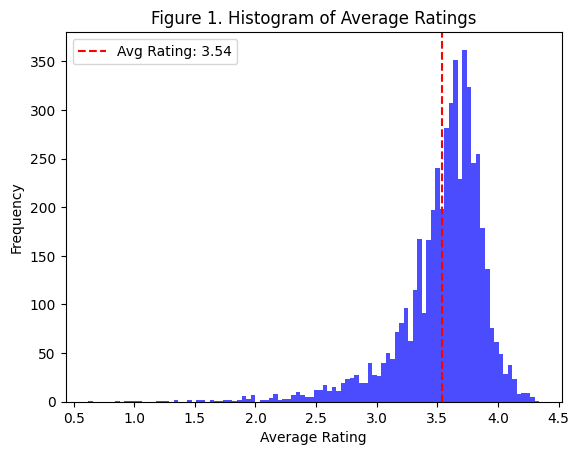

In [ ]:
# Extract the average ratings from the dataframe
avg_rating_data = df['avg_rating']

# Create a histogram of the averages.
plt.hist(avg_rating_data, bins=100, color='blue', alpha=0.7)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Figure 1. Histogram of Average Ratings')

# Find the mean of the data
avg_line = np.mean(df['avg_rating'])

# Plot a line indicating the mean
plt.axvline(avg_line, color='red', linestyle='--', label=f'Avg Rating: {avg_line:.2f}')
plt.legend()

# Show the histogram
plt.show()

In [ ]:
# If true, includes secondary genres in genre processing.
INCLUDE_SECONDARIES = False

# Extract genre columns
allPrims = list(df['primary_genres'])
allSecondaries = list(df['secondary_genres'])

# Form a set (unique list) of each genre name.
allGenres = set()

# Always add each primary genre to the set
for row in allPrims:
  for genreName in row.split(', '):
    allGenres.add(genreName)

# Only if the flag is set to true, add each sec. genre to the set
if INCLUDE_SECONDARIES:
  for row in allSecondaries:
    # Some albums have the secondary genre field set to 'NaN'
    # This if-statement prevents type errors.
    if type(row) == str:
      for genreName in row.split(', '):
        allGenres.add(genreName)

# Convert the set to a list
# This is necessary because sets are unordered.
allGenres = list(allGenres)

In [ ]:
# Extract descriptor column
allDescBoxes = list(df['descriptors'])

# Perform an equivalent process to the primary genres but for the descriptors.
allDescs = set()
for row in allDescBoxes:
  for desc in row.split(', '):
    allDescs.add(desc)
allDescs = list(allDescs)

In [ ]:
# This is the headers for each 27-D vector.
# First 22 dimensions are labeled by parent genres (see RYM Genres.csv)
# Last 5 dimensions are labeled by descriptor traits (see RYM Descriptors.csv)
columnNames = list(genreInfo.columns)[1:] + list(descInfo.columns)[1:]

In [ ]:
# A function which converts an album's genres and descriptors into a 27-D vector.
def vectorize(prims, secs, descs):

  # If the flag is true, the primary and secondary genres are counted.
  if INCLUDE_SECONDARIES:
    listedGenres = prims + secs
  # Otherwise, just use primary genres.
  else:
    listedGenres = prims

  genreVectors = [ ]
  # Iterate through each genre listed under an album
  for genre in listedGenres:
    # Get the specified row in the genre table
    row = genreRow = genreInfo[genreInfo['Genre Name'] == genre].to_numpy()
    # Safety in case the genre isn't present in the table.
    if len(row) == 0:
      continue
    # Selects every element of the row in order EXCEPT the first (the name of the genre)
    genreVectors.append(row[0][1:])
  # Takes an average of all the vectors in genreVectors
  avgGen = np.mean(genreVectors, axis=0)

  # Performes an equivalent process to genres but for the descriptors.
  descVectors = [ ]
  for desc in descs:
    row = descInfo[descInfo['Descriptor'] == desc].to_numpy()
    if len(row) == 0:
      continue
    descVectors.append(row[0][1:])
  avgDesc = np.mean(descVectors, axis=0)

  # Concatenates the genre and descriptor vectors together.
  return list(avgGen) + list(avgDesc)

In [ ]:
# Contains the vectors for each album in the dataset.
nHots = [ ]
# Iterate through each row in the album dataset.
for i in range(len(df)):

  # Primary genres will never be NaN, so we know it's a string.
  listedPrims = df.loc[i, 'primary_genres'].split(', ')
  secs = df.loc[i, 'secondary_genres']

  # Check to see if secondary genres aren't NaN.
  if (type(secs) == str):
    secs = secs.split(', ')
  else:
    secs = [ ]

  # Extract descriptors column and split by commas.
  listedDescs = df.loc[i, 'descriptors'].split(', ')
  # Certain descriptors are appended by ",..." which needs to be removed.
  fixedDescs = [st.replace(',...', '') for st in listedDescs]

  # Convert the collected genre and descriptor info to a vector.
  nHots.append(vectorize(listedPrims, secs, fixedDescs))


In [ ]:
# Convert the vectors into one large dataframe
nHotsDf = pd.DataFrame(nHots, columns = columnNames)
nHotsDf

,Ambient,Blues,Classical Music,Country,Dance,Electronic,Entertainment,Experimental,Folk,Hip Hop,...,R&B,Regional Music,Rock,Singer-Songwriter,Ska,Positive,Complex,Abrasive,Serious,Thematic
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.00,1.000000,0.0,0.0,-0.6,0.2,-0.3,0.3,0.3
1,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0,...,0.0,0.00,0.666667,0.0,0.0,-0.4,0.4,-0.4,0.2,0.3
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.00,1.000000,0.0,0.0,0.0,0.6,-0.3,0.3,0.4
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.00,1.000000,0.0,0.0,0.4,0.4,-0.3,0.1,0.2
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,...,0.0,0.00,0.000000,0.0,0.0,0.3,0.1,0.0,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.2,0.1,-0.7,0.2,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,0.2,0.0,-0.1,0.0,0.4
4997,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,...,0.0,0.00,0.000000,0.0,0.0,-0.2,0.1,0.0,0.2,0.3
4998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,...,0.0,0.25,0.000000,0.0,0.0,0.1,0.1,-0.3,0.2,0.4


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into a train and test set
# X represents the vector in nHotsDf
# y represents the corresponding average ratings
# Split is done 80% train, 20% test.
X_train,X_test,y_train,y_test = train_test_split(nHotsDf, df['avg_rating'], test_size=0.20)

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model.
model = LinearRegression()
# Train it off the train set.
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Generates a prediction array by predicting the result for each vector in X_test.
y_predicted = model.predict(X_test)

# Generates two metrics (MSE and MAPE) by comparing the actual ratings (y_test) with the predicted ratings (y_predicted)
print(mean_squared_error(y_test, y_predicted))
print(mean_absolute_percentage_error(y_test, y_predicted))



0.11201516050136626
0.0749042634689468


In [ ]:
# Simple function which gives the output for a given series of primary genres and descriptors.
def makePrediction(prims, descs):
  return model.predict([ vectorize(prims, [ ], descs) ] )[0]

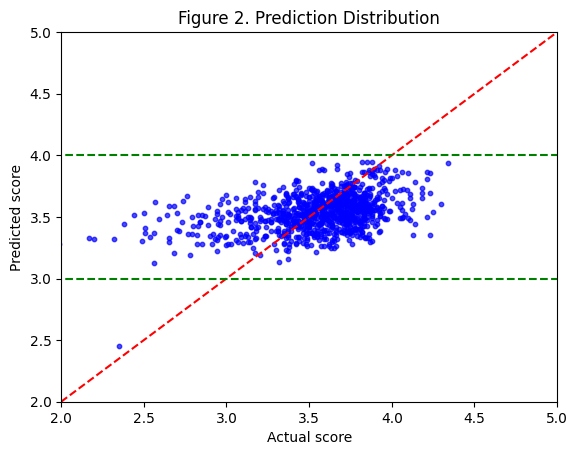

In [ ]:
# Create a scatterplot for the distribution of predictions.
plt.scatter(y_test, y_predicted, color='blue', alpha=0.7, s=10)
plt.xlabel('Actual score')
plt.ylabel('Predicted score')
plt.title('Figure 2. Prediction Distribution')

# Set the x and y-axis limits
plt.xlim(2,5)
plt.ylim(2,5)

# Draw a line with a slope of 1 (actual == predicted)
# The accuracy of a prediction is determined by its closeness to this line.
plt.plot([0, 5], [0, 5], color='red', linestyle='--')

# Bounds the region of predicted ratings from 3.0 to 4.0.
plt.plot([0, 5], [3, 3], color='green', linestyle='--')
plt.plot([0, 5], [4, 4], color='green', linestyle='--')


# Show the scatterplot
plt.show()

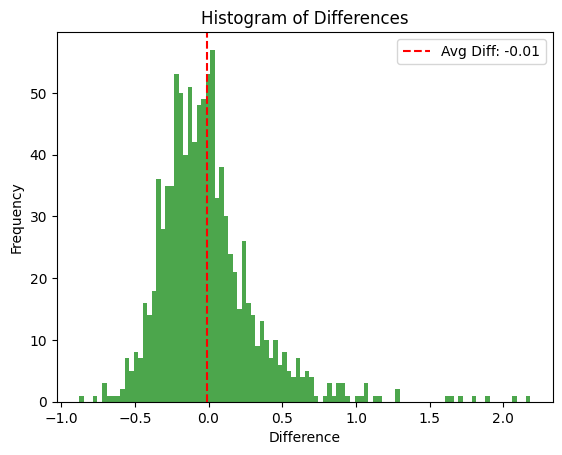

In [ ]:
# (DIAGRAM NOT INCLUDED IN PAPER)

# Calculate the differences between each member of the two arrays
# (This value is another array)
diff = y_predicted - y_test

# Create a histogram of the differences
plt.hist(diff, bins=100, color='green', alpha=0.7)
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')

# Finds the average difference.
avg_diff = np.mean(diff)

# Plot the location of the mean on the histogram.
plt.axvline(avg_diff, color='red', linestyle='--', label=f'Avg Diff: {avg_diff:.2f}')
plt.legend()

# Show the histogram
plt.show()